In [1]:
import torch
import tqdm
import numpy as np
from sklearn.manifold import TSNE
from torchvision import datasets, models, transforms
from vgg_face import *
from FAUDataset import *
import matplotlib.pyplot as plt

In [2]:
def plot_loss(contents, title):
    train_loss_list = []
    for i in range(len(contents)):
        if 'train_loss' in contents[i]:
            train_loss_list.append(float(contents[i][contents[i].index(':')+1:]))

    test_loss_list = []
    for i in range(len(contents)):
        if 'test_loss' in contents[i]:
            test_loss_list.append(float(contents[i][contents[i].index(':')+1:]))
    plt.plot(test_loss_list, label='test')
    plt.plot(train_loss_list, label='train')
    plt.ylabel('MSE loss')
    plt.title(title) # General MSE Loss
    plt.ylim([0, 0.05])
    plt.legend()
    plt.show()

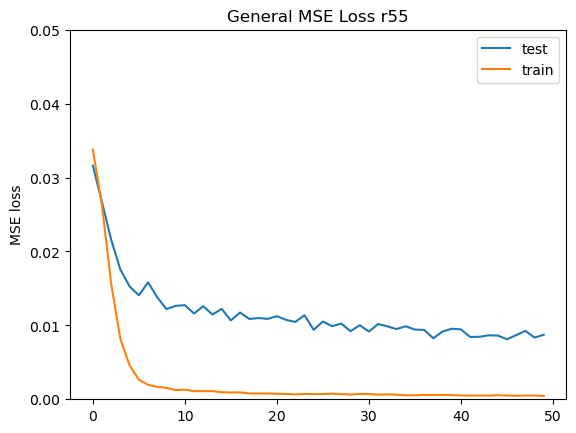

In [4]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r55/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r55')

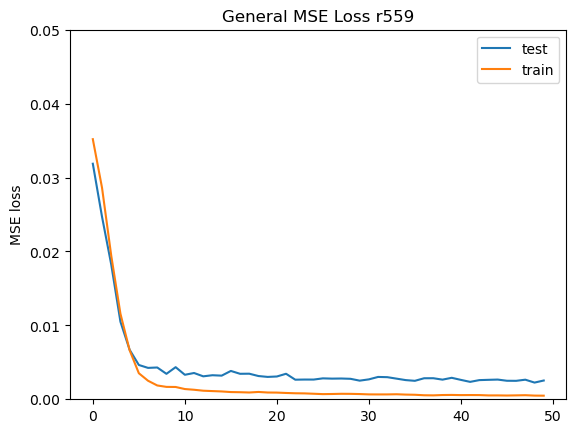

In [4]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r559/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r559')

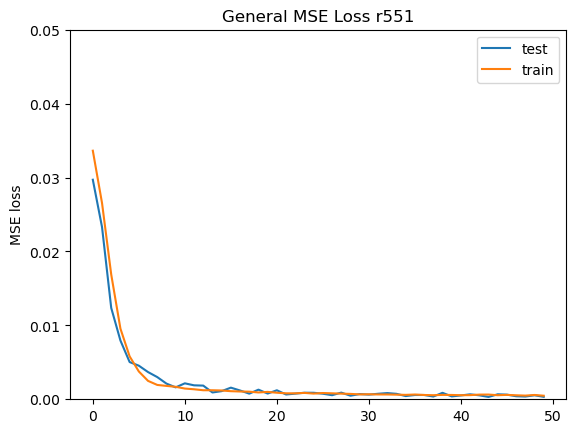

In [8]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r551/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r551')

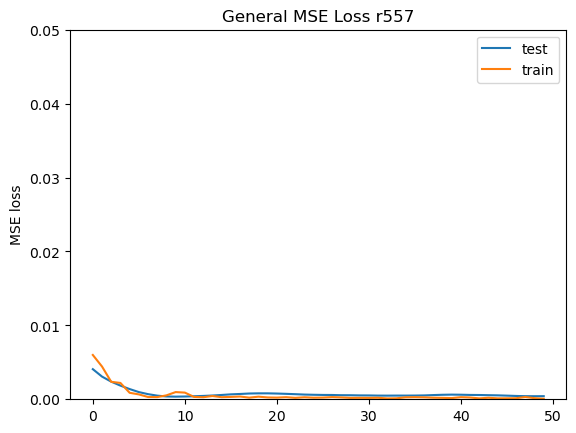

In [3]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r557/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r557')

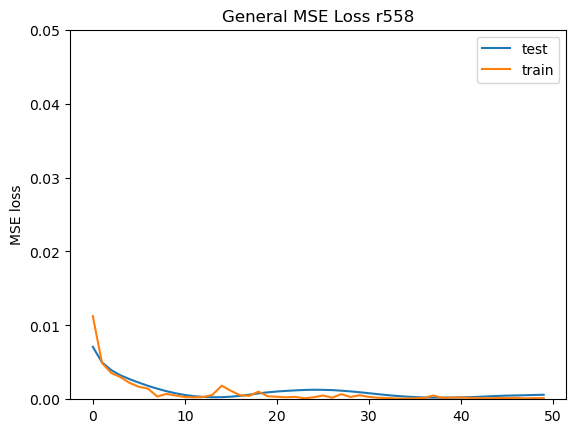

In [4]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r558/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r558')

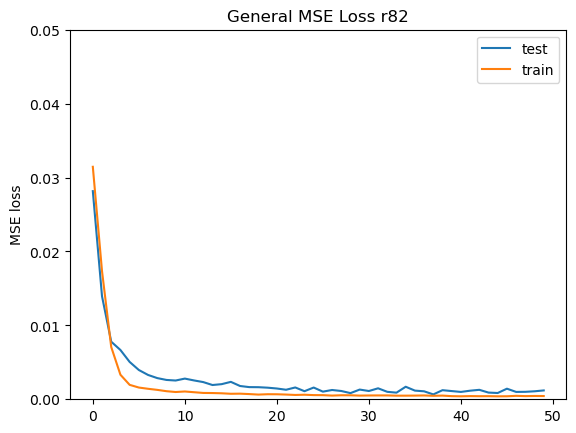

In [6]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r82/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r82')

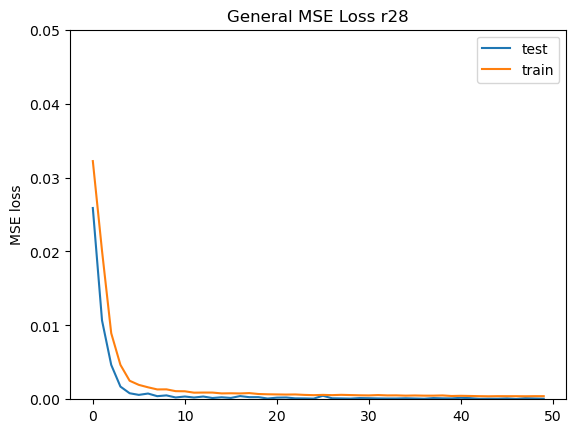

In [7]:
with open('/Volumes/Yuan-T7/GitHub/FAU_Dataset/code/results_r28/results.txt') as f:
    lines = f.readlines()
plot_loss(lines, 'General MSE Loss r28')

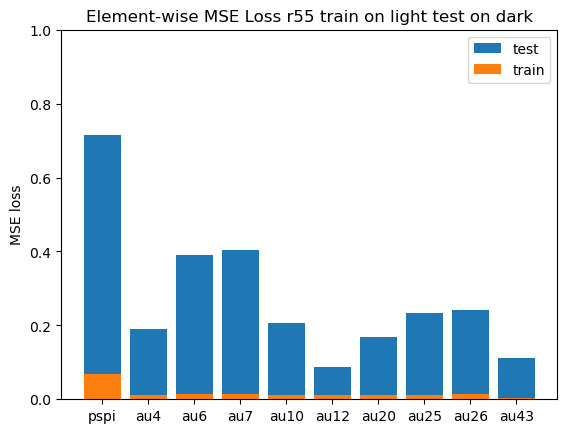

In [14]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.0676679, 0.01097045, 0.01296659, 0.01536401, 0.01177868, 0.01214748, 0.01171816, 0.0121143, 0.01373111, 0.00284729]
test_mse_aus = [0.71537631, 0.18964844, 0.39081155, 0.40517712, 0.20770589, 0.08648273, 0.1682063, 0.23408949, 0.24242886, 0.11181538]
plt.bar(aus, test_mse_aus, label='test')
plt.bar(aus, train_mse_aus, label='train')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r55 train on light test on dark')
plt.ylim([0, 1])
plt.legend()
plt.show()

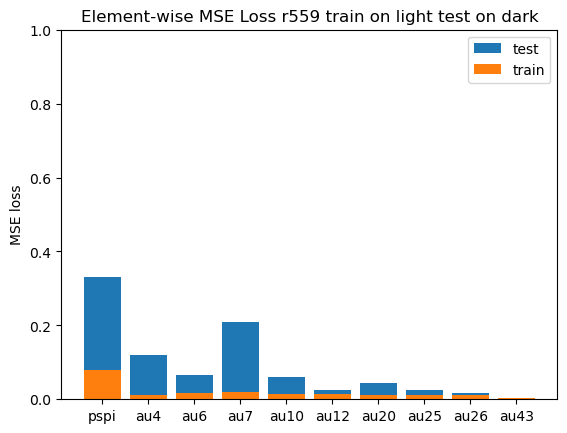

In [5]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.07808581, 0.01160748, 0.01579551, 0.01873392, 0.01320354, 0.01492189, 0.01073727, 0.01214318, 0.01095203, 0.00296521]
test_mse_aus = [0.33204831, 0.12004465, 0.06658989, 0.20941738, 0.05997024, 0.02455787, 0.04331531, 0.02545058, 0.01690772, 0.00229034]
plt.bar(aus, test_mse_aus, label='test')
plt.bar(aus, train_mse_aus, label='train')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r559 train on light test on dark')
plt.ylim([0, 1])
plt.legend()
plt.show()

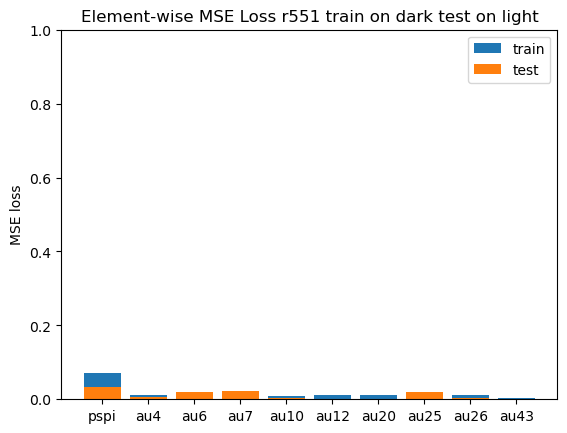

In [18]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.07085363, 0.01288192, 0.01796305, 0.01498074, 0.01012568, 0.01278083, 0.01278718, 0.01552038, 0.0107819, 0.00382071]
test_mse_aus = [0.03348045, 0.00485041, 0.02015983, 0.02231819, 0.00258488, 0.0017441, 0.00185141, 0.01910146, 0.00390678, 0.00146751]
plt.bar(aus, train_mse_aus, label='train')
plt.bar(aus, test_mse_aus, label='test')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r551 train on dark test on light')
plt.ylim([0, 1])
plt.legend()
plt.show()

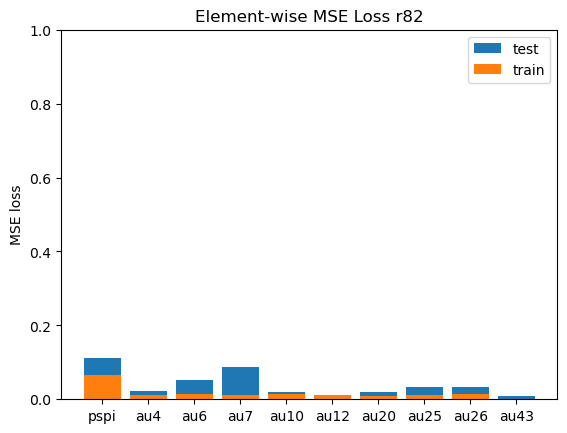

In [10]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.06687088, 0.01256855, 0.01419177, 0.01186881, 0.01390943, 0.0112457, 0.00967603, 0.0120435, 0.01408011, 0.00173172]
test_mse_aus = [0.11142459, 0.02250233, 0.05091965, 0.0870474, 0.01849649, 0.00908172, 0.02051324, 0.03424237, 0.03312092, 0.00790383]
plt.bar(aus, test_mse_aus, label='test')
plt.bar(aus, train_mse_aus, label='train')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r82')
plt.ylim([0, 1])
plt.legend()
plt.show()

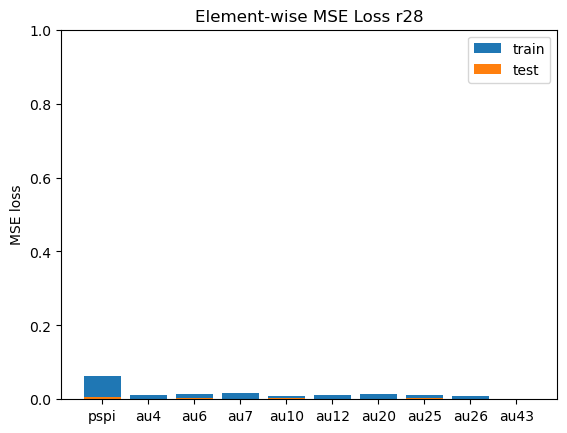

In [17]:
aus = ['pspi', 'au4', 'au6', 'au7', 'au10', 'au12', 'au20', 'au25', 'au26', 'au43']
train_mse_aus = [0.06376902, 0.01045442, 0.01431137, 0.01596268, 0.00831833, 0.01161514, 0.0138394, 0.01112007, 0.00835943, 0.0018181]
test_mse_aus = [0.00725872, 0.00202403, 0.00374316, 0.0019379, 0.00320187, 0.0014463, 0.00094968, 0.00315826, 0.00050972, 0.00028385]
plt.bar(aus, train_mse_aus, label='train')
plt.bar(aus, test_mse_aus, label='test')
plt.ylabel('MSE loss')
plt.title('Element-wise MSE Loss r28')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [18]:
import scipy.io
mat = scipy.io.loadmat('/Volumes/Yuan-T7/Datasets/UNBCMcMaster_cropped/Images0.3/042-ll042/ll042t1afaff/ll042t1afaff027_keypoints.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Dec  5 10:56:27 2018',
 '__version__': '1.0',
 '__globals__': [],
 'box': array([[136,  68, 101, 125]], dtype=int32),
 'confidence': array([[0.99995375]]),
 'keypoints': array([[(array([[158, 112]], dtype=int32), array([[206, 114]], dtype=int32), array([[174, 139]], dtype=int32), array([[159, 165]], dtype=int32), array([[201, 167]], dtype=int32))]],
       dtype=[('left_eye', 'O'), ('right_eye', 'O'), ('nose', 'O'), ('mouth_left', 'O'), ('mouth_right', 'O')])}

In [9]:
def read_au(path, dtype = 'txt'):
    if dtype == 'txt':
        f=open(path + '.txt', "r")
        scorestr = f.readlines()
        f.close()
        scorestr = [x.strip() for x in scorestr]
        au = np.zeros((64,))
        for line in scorestr:
            words = [x.strip() for x in line.split(' ') if x]
            aunumberstr = words[0]
            auintensitystr = words[1]
            aunumber = float(aunumberstr[0:aunumberstr.find('e')]) * (10** int(aunumberstr[aunumberstr.find('+')+1:]))
            auintensity = float(auintensitystr[0:auintensitystr.find('e')]) * (10** int(auintensitystr[auintensitystr.find('+')+1:]))
            au[int(aunumber)-1] = auintensity
        au = np.array(au[[3,5,6,9,11,19,24,25,42]])

    elif dtype == 'npy':
        au = np.load(path+'.npy')
    elif dtype == 'npz':
        au = np.load(path+'.npz')['output']

    return au

read_au('/Volumes/Yuan-T7/Datasets/UNBCMcMaster/Frame_Labels/FACS/042-ll042/ll042t1afaff/ll042t1afaff027_facs')

array([0., 2., 0., 0., 2., 0., 0., 0., 0.])

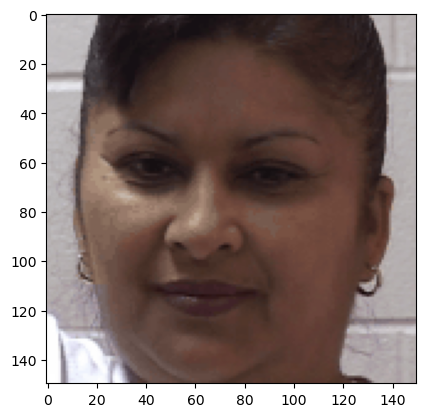

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Volumes/Yuan-T7/Datasets/UNBCMcMaster/Images/042-ll042/ll042t1afaff/ll042t1afaff027.png')
img = torch.tensor(img[50:200, 115:265, :])
imgplot = plt.imshow(img)
plt.show()

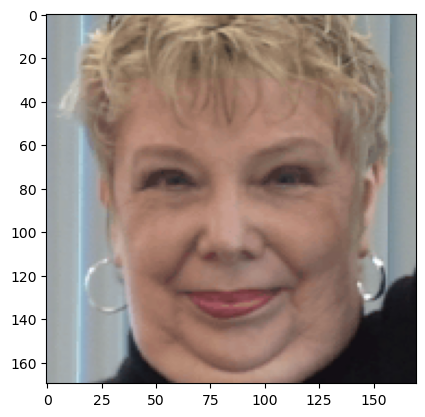

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Volumes/Yuan-T7/Datasets/UNBCMcMaster/Images/080-bn080/bn080t1afaff/bn080t1afaff200.png')
imgplot = plt.imshow(img[50:220, 25:195, :])
plt.show()